# Dimensionality Reduction Techniques

_Kevin Siswandi_  
**Fundamentals of machine learning**  
June 2020  

- Many parameters need to be selected
- The fidelity of the low-dimensional representation depends on the chosen parameters and intrinsic dimensionality of the data.
- The parameters control the tradeoff between stiffness and flexibility

We say that the lower-dimensional projection is either too stiff or too flexible when
- Too stiff = faraway points get mapped to nearby locations
- Too flexible = nearby points get mapped to faraway locations

In real-world datasets, usually the intrinsic dimensionality is much lower than the nominal dimensionality. The first thing to do, is almost always PCA.

## Principal Component Analysis

We will approach PCA here from the perspective of Singular Value Decomposition. We are looking for a rank-1 approximation to find the principal components. This is achived by decomposing the original data matrix X ($p \times n$) into:
- principal components -- new basis in terms of old basis
- scores -- coordinates in the new, lower dimensional basis

Some properties:
- The principal component matrix $U$ is of shape $p \times r$, where $r \leq p$.
- The scores matrix $Z$ is $r \times n$.
- The principal components are orthonormal to each other, i.e. $U^T U = I$

Singular Value Decomposition says that X can always be decomposed into

$$ X = U Z = U S V^T$$

where S is a diagonal matrix. The optimization problem solved by PCA is

$$ arg\min_{U, Z} || X - UZ||_F^2 $$

such that the product UZ has rank r. The decomposition is unique if singular values in diagonal matrix S are unique (nondegenerate). As a concrete example, consider a data matrix X of shape $p \times n$, where $p \leq n$. Then:
* U is of shape p x p
* S is of shape p x p
* $V^T$ is of shape p x n
* $U^T U = I_p$ (identity matrix of p dimension)
* $V V^T = I_n$ (identity matrix of n dimension)

The optimization problem can also be written as

$$ arg\min_\tilde{X} || X - \tilde{X}||_F^2 $$

such that rank($\tilde{X}$) = r, where:
* X -- original data
* Z -- low dimensional representation (encoding of X)
* $\tilde{X}$ -- approximation to original data/decoding of Z

Note that the encoding can be done via $ Z = U^T X$, and the approximation/decoding computed as $ \tilde{X} = UZ$.

## Autoencoders

Note that both the encoding and decoding in PCA are linear operations. How do we go nonlinear? In autoencoders, the encoding and decoding are implemented by nonlinear neural networks. This is achieved by:

$$ arg\min_{\theta_e, \theta_d} \sum_i L(x_i, f_d(f_e(x_i; \theta_e); \theta_d)) $$

where L is the loss function, $f_e$ and $f_d$ are the encoding and decoding functions (from the neural network).

In [104]:
def new_instances(n):
    a=[]
    b=[]
    for i in range(n):
        mu, cov, p=fit_qda(x_training, y_training)
        a.append(np.random.multivariate_normal(mu[0], cov[0]))   #will generate only instances of digit 4.
        b.append(np.random.multivariate_normal(mu[1], cov[1]))   #will generate only instances of digit 9.
        #a[i]=np.reshape(a[i], (8,8))
    a=np.reshape(a, (8,8,8)) 
    b=np.reshape(b, (8,8,8)) 
    return a,b
    

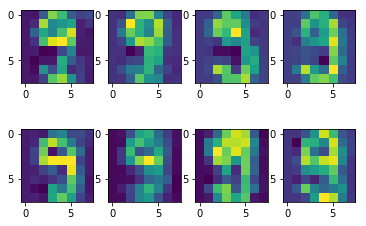

In [106]:
for i in range (8):
    plt.subplot(2,4,i+1)
    
    plt.imshow(B[i])
  
plt.show()

We observe that most of the new instances generated from the QDA algorithm are slightly recognisable (as 4 and 9). When the discriminative information is not in the means or covariances of the classes (hers 4 and 9), that information might be lost while generating new datasets. 